### Importación de datos



In [250]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [251]:
#print(tienda["Producto"])
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
datosTiendas = [tienda, tienda2, tienda3, tienda4]
sumaTiendas = {tienda : ventas['Precio'].sum() for tienda, ventas in zip(tiendas, datosTiendas)}
"""
sumaTiendas = {
          "Tienda1": tienda['Precio'].sum(),
          "Tienda2": tienda2['Precio'].sum(),
          "Tienda3": tienda3['Precio'].sum(),
          "Tienda4": tienda4['Precio'].sum()
          }
"""
for key, value in sumaTiendas.items():
  print(f"Total ventas {key}: ${str(int(value))}")

Total ventas tienda1: $1150880400
Total ventas tienda2: $1116343500
Total ventas tienda3: $1098019600
Total ventas tienda4: $1038375700


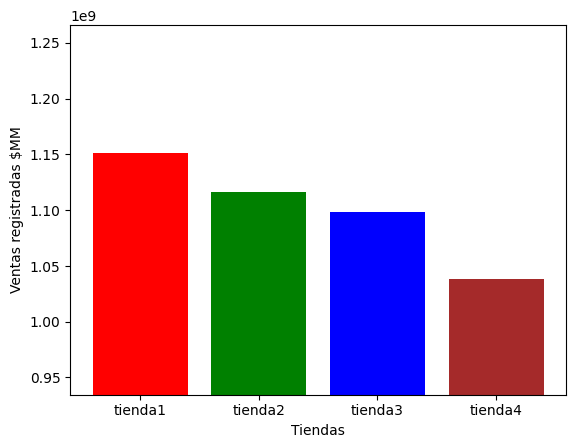

In [252]:
import matplotlib.pyplot as plot

grafColores = ['red', 'green', 'blue', 'brown']
fig, ax = plot.subplots()
plot.bar(x = sumaTiendas.keys(), height = sumaTiendas.values(), color = grafColores)
plot.ylabel('Ventas registradas $MM')
plot.xlabel('Tiendas')
ax.set_ylim( min(sumaTiendas.values())*.9, max(sumaTiendas.values())*1.1 )
plot.show()

# 2. Ventas por categoría

In [253]:
# ventasPorCategoria = { 'categoria' : totalVendido }
grafDonutVentaCategoria = { }
for nombreTienda, ventasTienda in zip(tiendas, datosTiendas):
  ventasPorGrupo = ventasTienda.groupby('Categoría del Producto')["Precio"].sum().sort_values(ascending = True)
  ventasPorCategoria = {nombreGrupo : round(valorGrupo)
                          for nombreGrupo, valorGrupo in ventasPorGrupo.items()}
  grafDonutVentaCategoria[nombreTienda] = ventasPorCategoria
#print(grafDonutVentaCategoria)

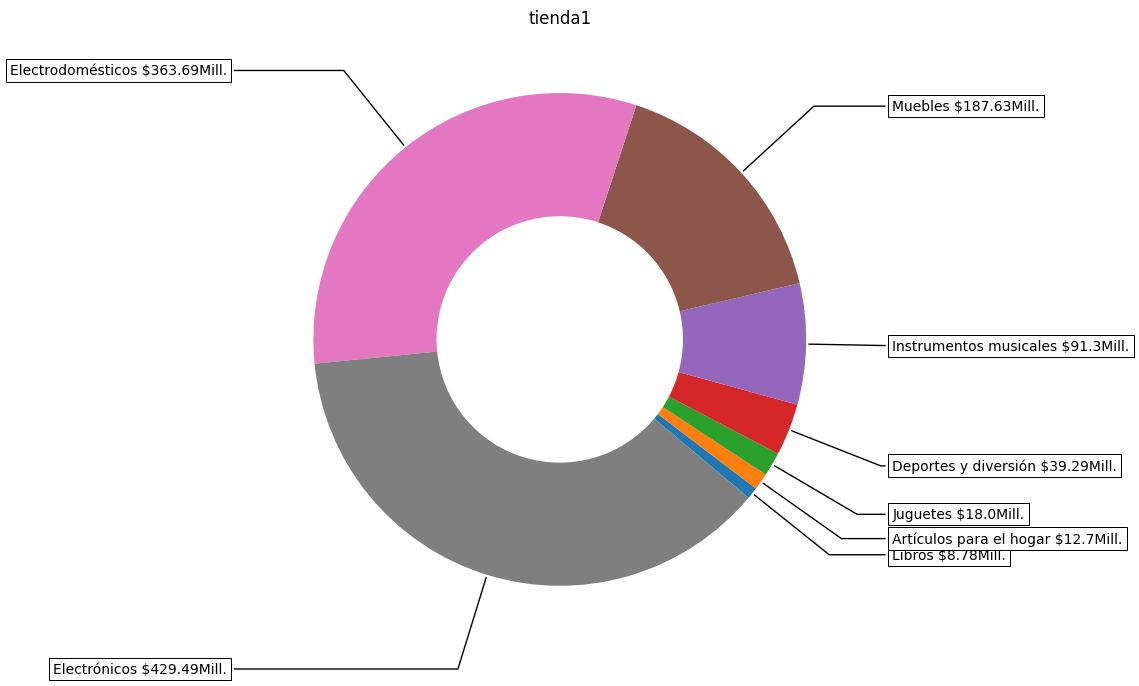

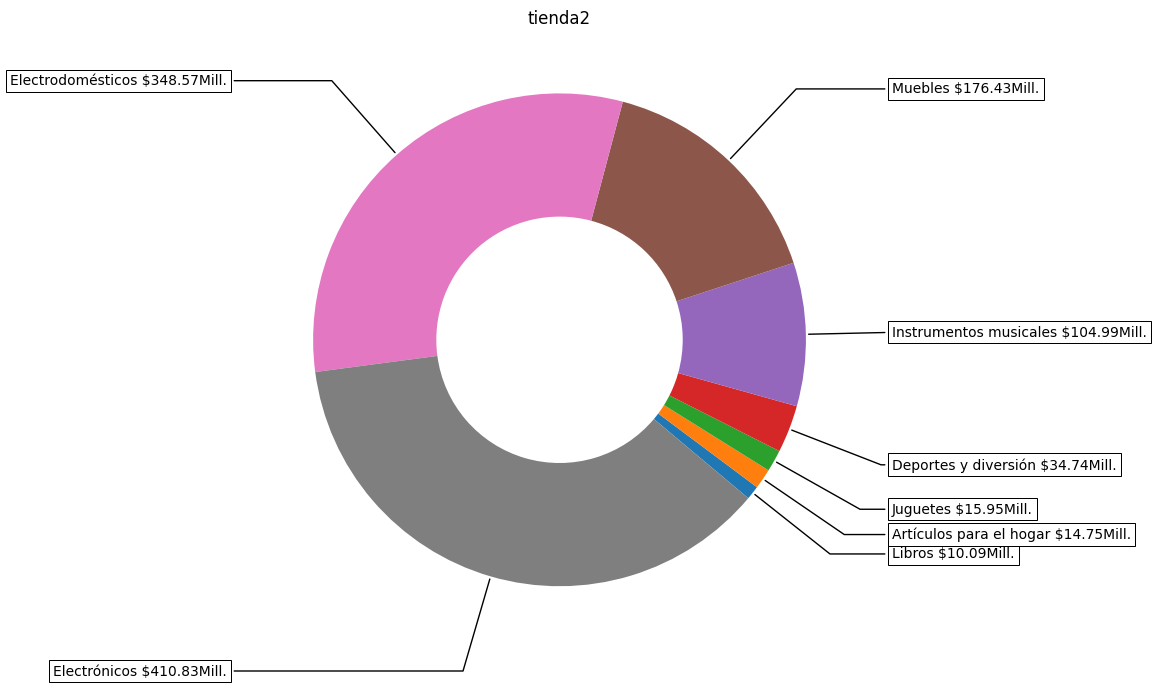

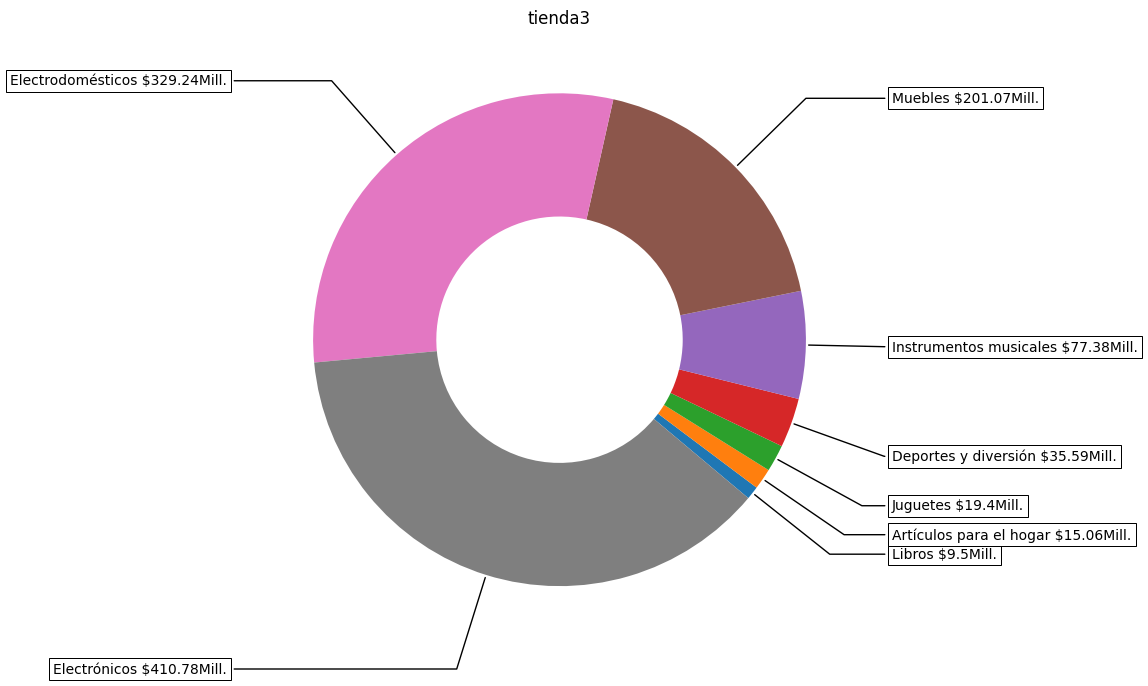

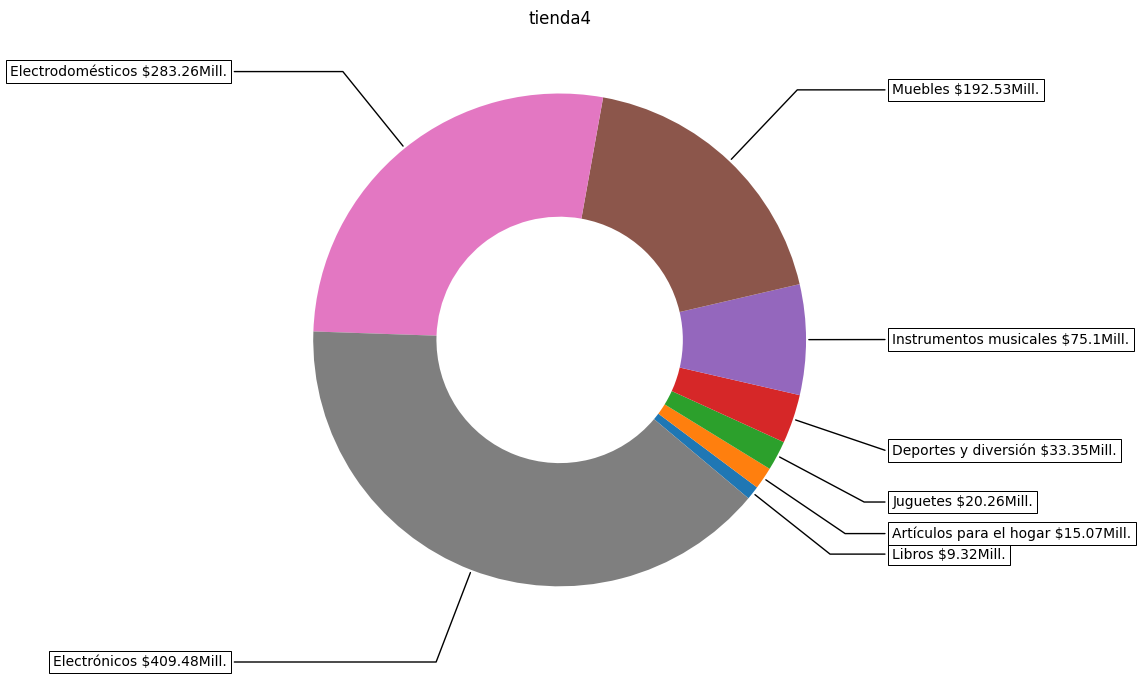

In [254]:
#print(grafDonutVentaCategoria.values())
for key, value in grafDonutVentaCategoria.items():

  fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

  wedges, texts = ax.pie(value.values(), wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = f"angle,angleA=0,angleB={ang}"
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      categoria = str(list(value.keys())[i]) + " $" + str(round(list(value.values())[i]/1000000,2)) + "Mill."
      ax.annotate(categoria, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                  horizontalalignment=horizontalalignment, **kw)

  ax.set_title(key)

  plot.show()
  print()


# 3. Calificación promedio de la tienda


In [255]:
promedioTiendas = {tienda : ventas['Calificación'].mean(skipna=True) for tienda, ventas in zip(tiendas, datosTiendas)}
for key, value in promedioTiendas.items():
  print(f"Promedio {key}: {round(value, 4)}")

Promedio tienda1: 3.9767
Promedio tienda2: 4.0373
Promedio tienda3: 4.0483
Promedio tienda4: 3.9958


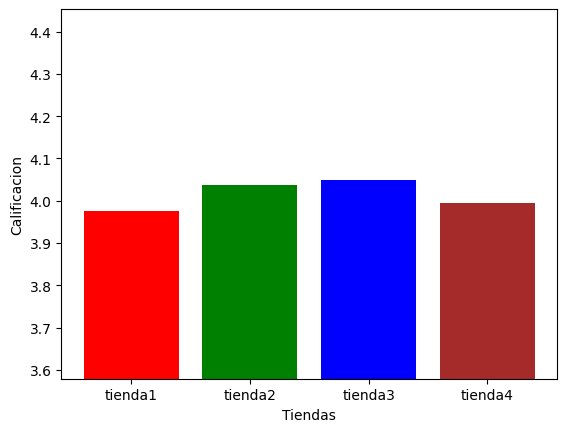

In [256]:
grafColores = ['red', 'green', 'blue', 'brown']
fig, ax = plot.subplots()
plot.bar(x = promedioTiendas.keys(), height = promedioTiendas.values(), color = grafColores)
plot.ylabel('Calificacion')
plot.xlabel('Tiendas')
ax.set_ylim( min(promedioTiendas.values())*.9, max(promedioTiendas.values())*1.1 )
plot.show()

# 4. Productos más y menos vendidos

In [257]:
# ventasPorProducto = { 'categoria' : totalVendido }
# declaramos fuera del loop para que no se pierda
listaProductosVendidos = {}
for nombreTienda, ventasTienda in zip(tiendas, datosTiendas):
  # recogemos el listado agrupado por 'Producto' de mayor a menor
  ventasPorGrupo = ventasTienda.groupby('Producto')["Precio"].sum().sort_values(ascending = False)

  listaProductosVendidos[nombreTienda] = {}  # inicializar diccionario para la tienda
  listaProductosVendidos[nombreTienda]["Mas Vendido"] = list(ventasPorGrupo.items())[0]
  listaProductosVendidos[nombreTienda]["Menos Vendido"] = list(ventasPorGrupo.items())[-1]

masVendidoMonto = []
menosVendidoMonto = []
for tienda in listaProductosVendidos.keys():
  masVendidoMonto.append(round(listaProductosVendidos[tienda]["Mas Vendido"][1]/1000000,2))
  menosVendidoMonto.append(round(listaProductosVendidos[tienda]["Menos Vendido"][1]/1000000,2))

print(masVendidoMonto)
print(menosVendidoMonto)

#print(listaProductosVendidos)

[142.15, 113.23, 99.89, 96.7]
[0.65, 0.64, 0.64, 0.7]


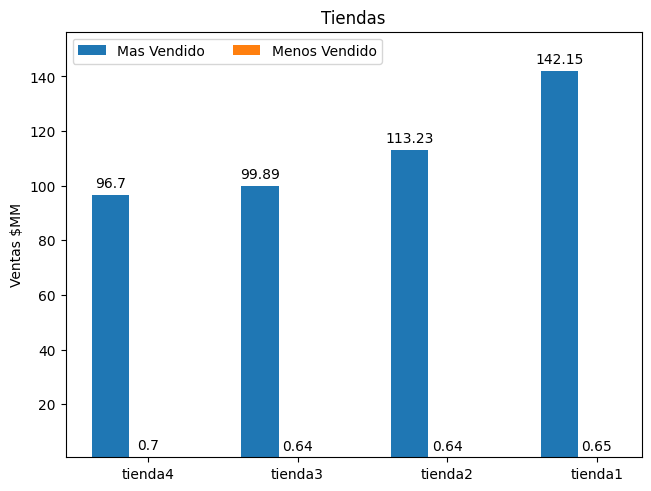

In [258]:
#print(listaProductosVendidos)

penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

prodVendidos = {
    'Mas Vendido': tuple(masVendidoMonto),
    'Menos Vendido': tuple(menosVendidoMonto),
}

x = -np.arange(len(listaProductosVendidos.keys()))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plot.subplots(layout='constrained')

for attribute, measurement in prodVendidos.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventas $MM')
ax.set_title('Tiendas')
ax.set_xticks(x + width, listaProductosVendidos.keys())
ax.legend(loc='upper left', ncols=3)
ax.set_ylim( min(menosVendidoMonto)*.9, max(masVendidoMonto)*1.1 )

plot.show()


# 4.2 Productos más y menos vendidos (Donuts)

In [259]:
# ventasPorProducto = { 'categoria' : totalVendido }
# declaramos fuera del loop para que no se pierda
listaProductosVendidos = {}
for nombreTienda, ventasTienda in zip(tiendas, datosTiendas):
  # recogemos el listado agrupado por 'Producto' de mayor a menor
  ventasPorGrupo = ventasTienda.groupby('Producto')["Precio"].sum().sort_values(ascending = False)
  # llenamos el Diccionario con la informacion en pares {nombreProductos : $Total}
  ventasPorProducto = {nombreProducto : round(totalVentas)
                        for nombreProducto, totalVentas in ventasPorGrupo.items()}
  # llenamos el Diccionario con la informacion en pares {tienda : productos{nombreProductos : $Total}}
  listaProductosVendidos[nombreTienda] = ventasPorProducto

print(listaProductosVendidos)

{'tienda1': {'TV LED UHD 4K': 142150200, 'Refrigerador': 112143300, 'Iphone 15': 97902200, 'Smart TV': 67452100, 'Lavadora de ropa': 65783600, 'Lavavajillas': 62054900, 'Secadora de ropa': 59062400, 'Tablet ABXY': 47639800, 'Batería': 37693900, 'Guitarra eléctrica': 37292200, 'Microondas': 34761500, 'Celular ABXY': 32651000, 'Sofá reclinable': 31379400, 'Cama king': 31176600, 'Estufa': 29879500, 'Armario': 29462300, 'Bicicleta': 27444600, 'Cama box': 22094700, 'Silla de oficina': 17667300, 'Impresora': 16413300, 'Mesa de noche': 15679600, 'Guitarra acústica': 14074000, 'Kit de bancas': 12141200, 'Mesa de comedor': 10531500, 'Sillón': 9879200, 'Asistente virtual': 8058000, 'Mesa de centro': 7621900, 'Juego de mesa': 7614500, 'Smartwatch': 7452400, 'Set de ollas': 6307700, 'Auriculares': 5043700, 'Auriculares con micrófono': 4730800, 'Mochila': 3867200, 'Carrito de control remoto': 3761800, 'Modelado predictivo': 3172500, 'Balón de baloncesto': 2749800, 'Olla de presión': 2629300, 'Vaso 

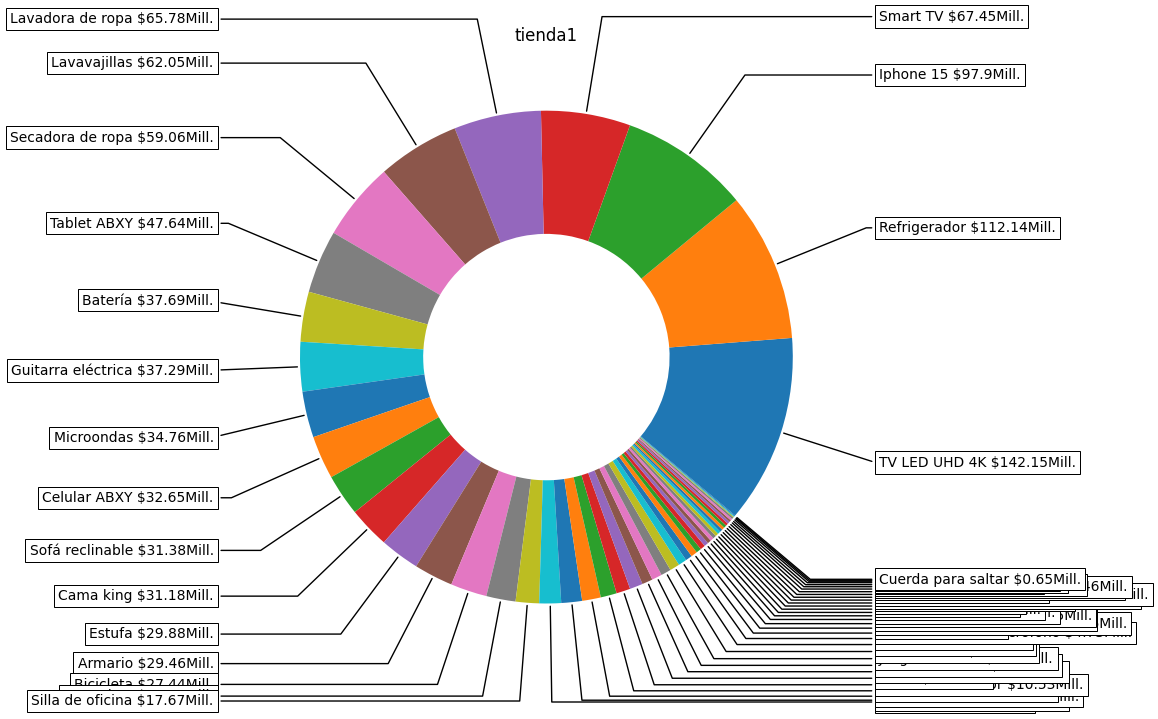

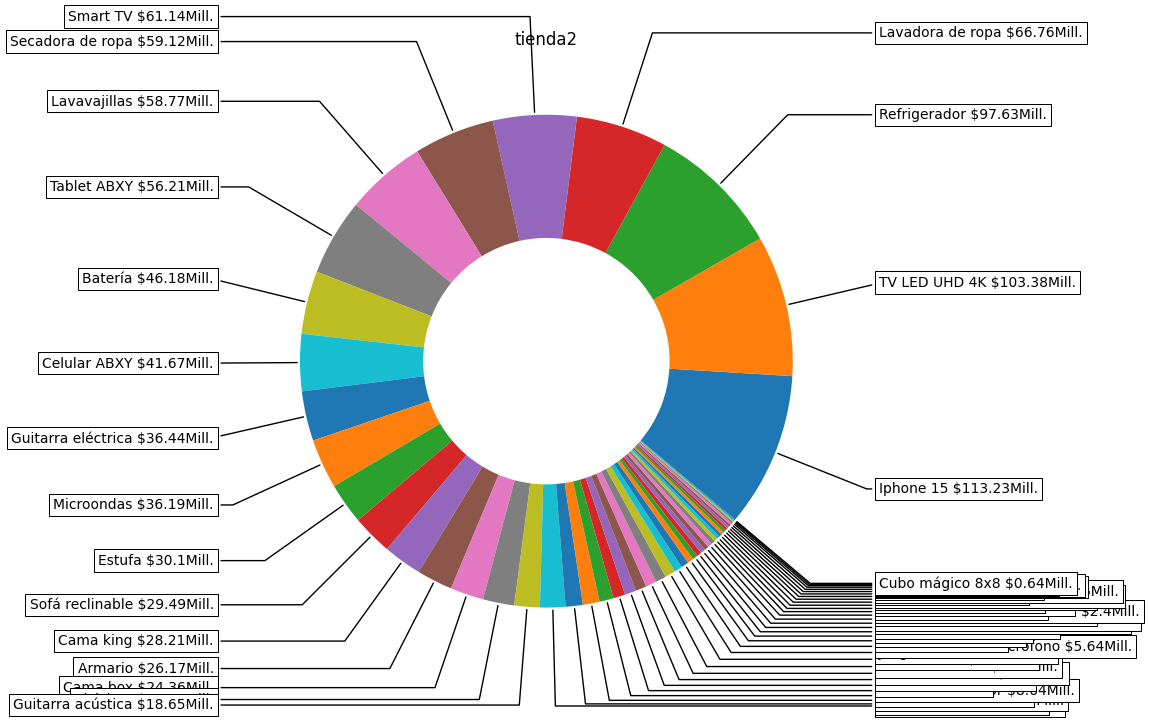

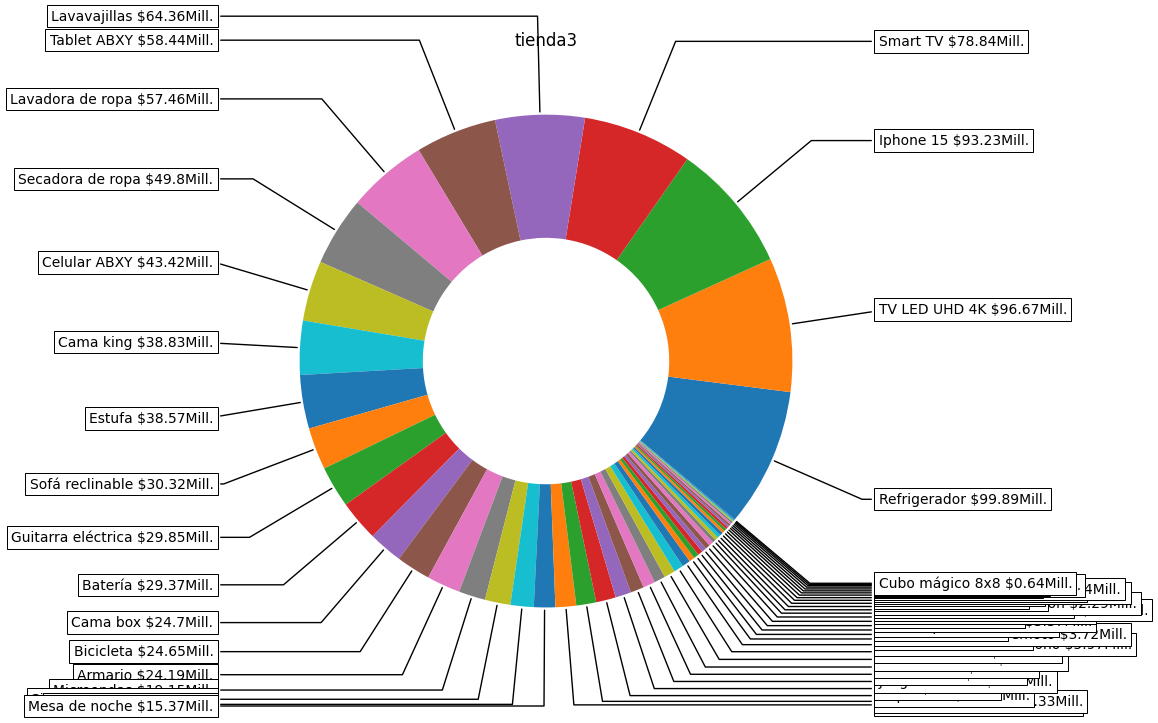

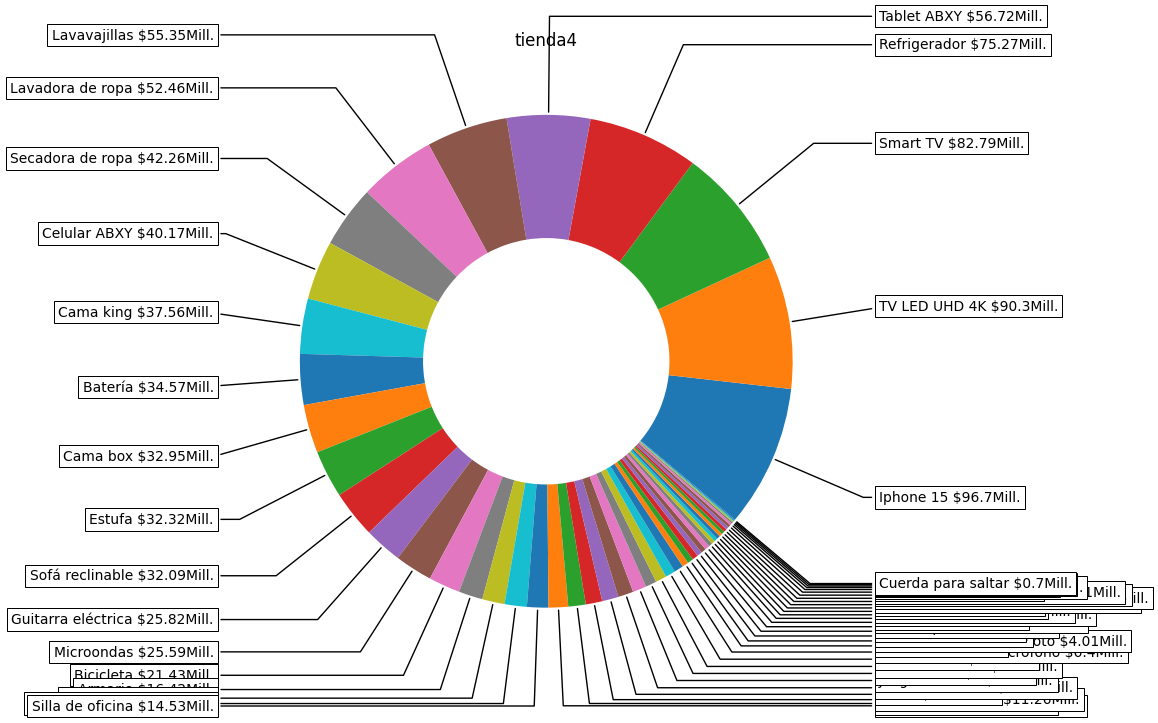

In [260]:
#print(listaProductosVendidos.values())
for key, value in listaProductosVendidos.items():

  fig, ax = plot.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

  wedges, texts = ax.pie(value.values(), wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = f"angle,angleA=0,angleB={ang}"
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      producto = str(list(value.keys())[i]) + " $" + str(round(list(value.values())[i]/1000000,2)) + "Mill."
      ax.annotate(producto, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                  horizontalalignment=horizontalalignment, **kw)

  ax.set_title(key)

  plot.show()
  print()


# 5. Envío promedio por tienda

In [261]:
promedioEnviosTiendas = {tienda : ventas['Costo de envío'].mean(skipna=True) for tienda, ventas in zip(tiendas, datosTiendas)}
for key, value in promedioEnviosTiendas.items():
  print(f"Envio promedio {key}: {round(value)}")

Envio promedio tienda1: 26019
Envio promedio tienda2: 25216
Envio promedio tienda3: 24806
Envio promedio tienda4: 23459


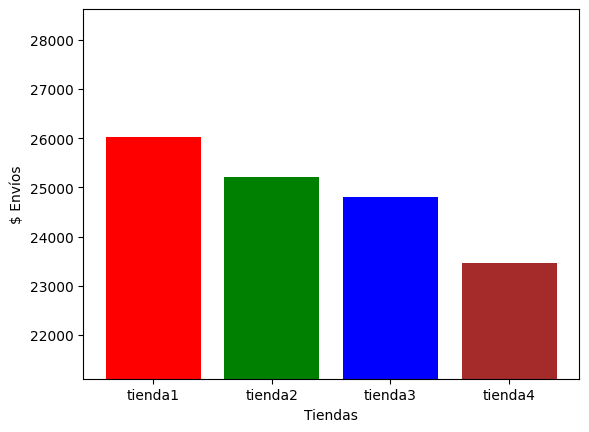

In [262]:
grafColores = ['red', 'green', 'blue', 'brown']
fig, ax = plot.subplots()
plot.bar(x = promedioEnviosTiendas.keys(), height = promedioEnviosTiendas.values(), color = grafColores)
plot.ylabel('$ Envíos')
plot.xlabel('Tiendas')
ax.set_ylim( min(promedioEnviosTiendas.values())*.9, max(promedioEnviosTiendas.values())*1.1 )
plot.show()